In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100) # Ekrana gösterilecek feature sayisi 100


# Regularization (Ridge, Lasso, ElasticNet) - Cross Validation - Gridsearch

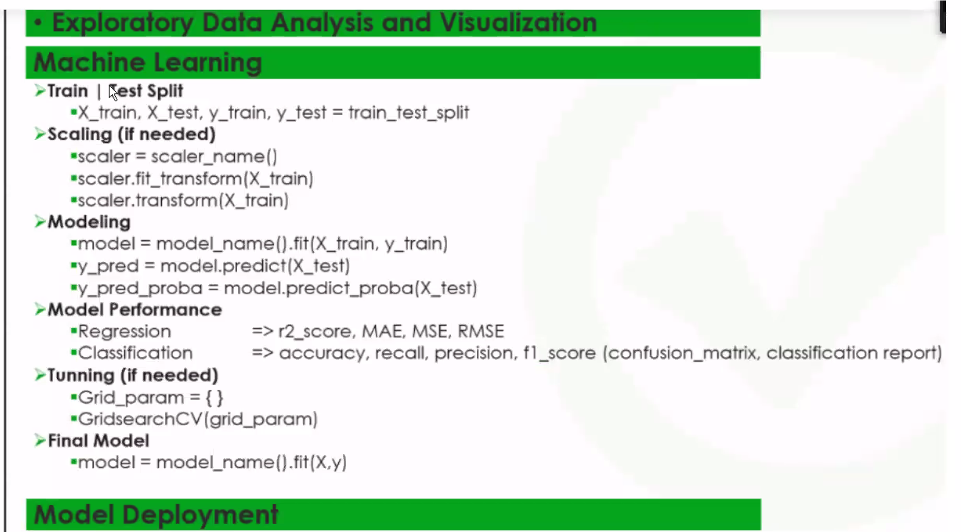

Ridge: katsiyi degerini azaltir, ama feature kalir.

Lasso: etkisi az olan feature lari siler. Onun icin bunu kullanabiliriz.

In [2]:
df = pd.read_csv("Advertising.csv")
df.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [3]:
X = df.drop("sales", axis=1)
y = df["sales"]

## Polynomial Conversation

In [4]:
# Lasso ve Ridge icin degerlendirmek üzere mevcut data stinden yeni feature lar üretelim

from sklearn.preprocessing import PolynomialFeatures

In [5]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

In [6]:
poly_features = polynomial_converter.fit_transform(X)

In [7]:
poly_features.shape  # uretilen feature sayisi 52, toplam 55

(200, 55)

## Train | Test Split

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features,y, test_size=0.3, random_state=101)

## Scaling Data

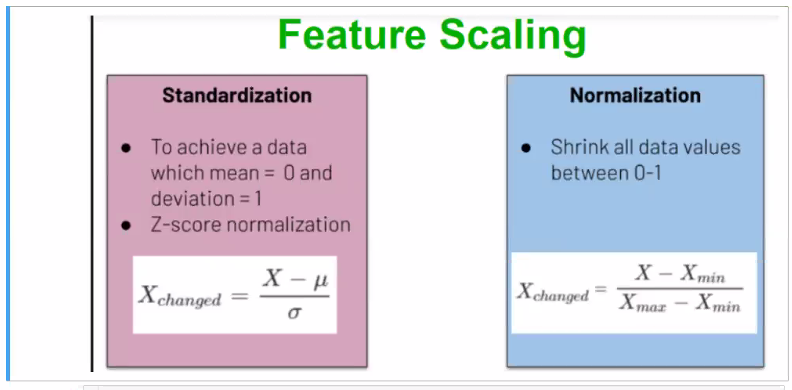

normalization ---> neural network + dummies feature + robust scaler

outlier lar cok isie robustscaler, veri setinin dagilimi normale yakinsa StandartScaler, belli bir araliga sikistirma islemi varsa MinMax Scaler

standardization ----> ML

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

# target variable a lineer ve logistic regresyonlarda scale yapilmaz 

In [70]:
# birçok outlier varsa RobustScaler olaibir
# veri setinin dagılımı normal dagılıma yakın ise StandadrdScaler
# belli bir aralığa sıkıştırma işlemi varsa MinMax Scaler

In [71]:
scaler.fit(X_train)   # daha önceden bilinen fit islemi yapilmayacak. 
                     # X_train icinde gezinerek std ve mean degerlrini alacak
# Not: scale islemini X_traine uygulayacagiz. daha sonra test'e uygulayacagiz. Ayri ayri scale yapacagiz
# X_train de hesapladigi std ve mean degerlerine gore Test datasini donusturecek

StandardScaler()

In [72]:
# X_train de hesapladigi std ve mean degerlerine gore Test datasini donusturecek

X_train_scaled = scaler.transform(X_train)
X_train_scaled

 # UST KISIMDA ELDE EDİLEN MEAN-STD DEGERLERİNİ DATAYA TRANSFER EDİP ZSKORU OLUŞTURUYORUZ

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [73]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

# X_train ile elde edilen mean-std degerine göre X_test i scale ediyoruz.

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

## Checking mean = 0 and StdDev =1 ??

In [74]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round() # 55 feature için mean ve std kontrolü

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [75]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


# Linear Regression

yukarda scale edilen datayı kullanıp Linearmodel oluşturacağız. (lm = Linear Model)


In [76]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()   

In [77]:
lm.fit(X_train_scaled, y_train)   # X_train in scale edilmiş halini kullanacağız

LinearRegression()

In [78]:
y_pred = lm.predict(X_test_scaled)  # prediction için yine test datasının scale edilmiş halini kullanıyoruz

In [79]:
y_train_pred = lm.predict(X_train_scaled)

In [80]:
# elde edilen skorları kolayca karşılaştırmak için bir kod blogu kullanalım
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

ilkel skor = vanilla model

In [81]:
ls = train_val(y_train,y_train_pred, y_test, y_pred, "linear")   # modelin adı
ls    # ls = linear model skorları

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


üstteki sonuçlara göre, R2 ve RMSE arasında tran ve test için ciddi bir farklılık vardır.
bunun adı Overfitting dir.. 
daha önce karşılaştığımız polynomial daki 5.dereceden itibaren görülen RMSE farklılaşması gibi..

## MultiColinearity

 independent variables arasında çok yuksek bir ilişki varsa (>= 0.9) Multicolinearity den bahsedilir
 Multicolinearity ile nasıl mücadele edilir:
 
 -Variable çıkarırsınız
 
 -Feature Engineering
 
 -Lasso veya Ridge
 
 -PCA
 
 alttaki kodların kaynak sayfası:
    https://www.geeksforgeeks.org/set-pandas-dataframe-background-color-and-font-color-in-python/

In [82]:
def color_red(val):  # google bulduğunuz kodu kendi kodumuza uyarlarız  ve yazılarn renklerini değiştiriz
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [83]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

# hucreleri renklendirmeye yarayan bir fonksiyon

limit_output extension: Maximum message size of 10000 exceeded with 299916 characters

## Cross Validation
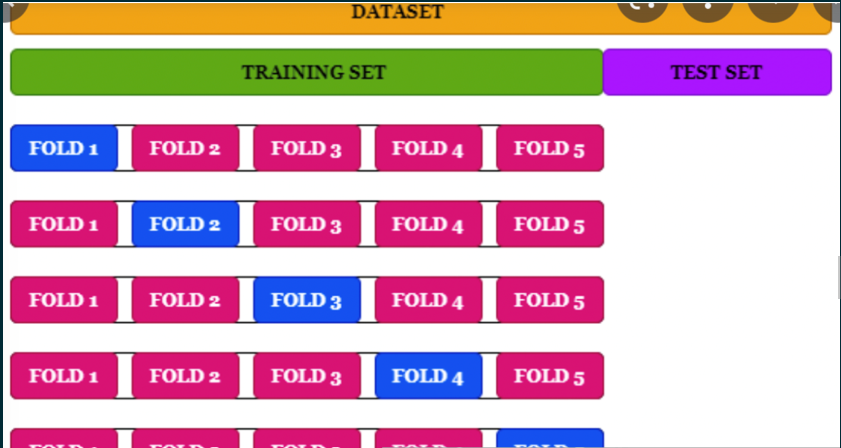

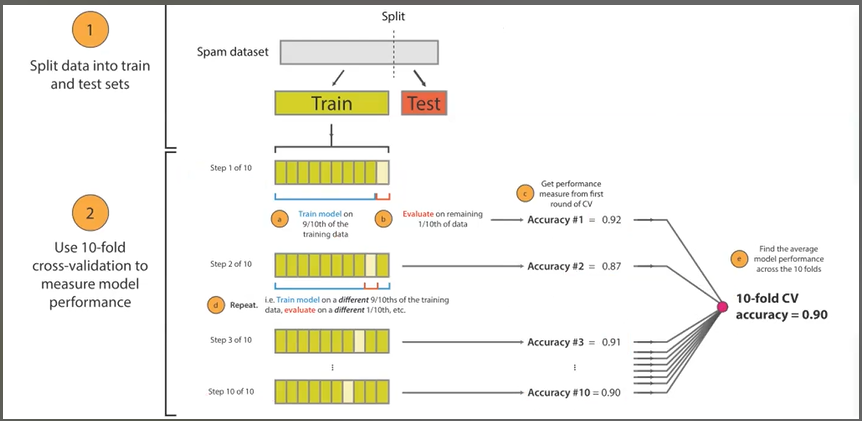

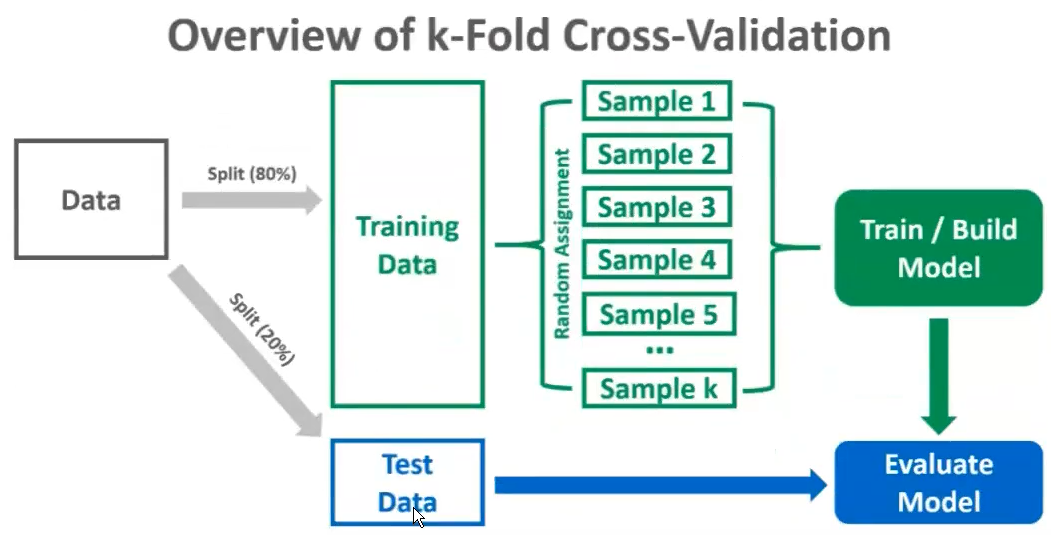

In [84]:
#pip install -U scikit-learn==1.1.2    veya

# pip3 install -U scikit-learn==1.1.2

In [85]:
from sklearn.model_selection import cross_validate

In [86]:
from sklearn.metrics import SCORERS

In [87]:
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jacca

In [88]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring=["r2", 'neg_mean_absolute_error',
                                                                'neg_mean_squared_error', \
                                                                'neg_root_mean_squared_error'], cv = 10)

In [89]:
# cv skorlarini alalim

pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.005000,0.001513,-0.280734,-1.994430,-31.328119,-5.597153
2,0.001999,0.001000,0.993019,-0.377066,-0.250648,-0.500647
3,0.002995,0.001509,0.983934,-0.392312,-0.306241,-0.553391
4,0.002034,0.001007,0.825272,-0.979767,-4.402358,-2.098180
5,0.002998,0.000000,0.991181,-0.322253,-0.166869,-0.408496
6,0.002000,0.001000,0.969012,-0.484493,-0.976815,-0.988339
7,0.002006,0.001002,0.992885,-0.327955,-0.144808,-0.380536
8,0.002999,0.000999,0.990130,-0.447015,-0.332058,-0.576244
9,0.001000,0.001504,0.965508,-0.465024,-0.528863,-0.727230
10,0.003044,0.001000,0.990123,-0.324433,-0.197801,-0.444748


In [90]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                             0.842033
test_neg_mean_absolute_error       -0.611475
test_neg_mean_squared_error        -3.863458
test_neg_root_mean_squared_error   -1.227496
dtype: float64

In [91]:
# önceki skorlarla karsilastiralim
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


In [92]:
lm.coef_     # feature larin etkileri

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [93]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


# Regularization

Ridge & Lasso & Elastic Net

L1: Lasso      L2: Ridge  (L1+L2) Elastic Net


Regularizasyon, makine öğrenmesinde aşırı uyum (overfitting) sorununu azaltmak için kullanılan bir yöntemdir. Aşırı uyum, makine öğrenimi modelinin eğitim verilerine çok iyi uyum sağlaması ama yeni, görülmemiş verilerle karşılaştığında kötü performans göstermesi durumudur. Başka bir deyişle, model eğitim verilerinin gürültüsünü ve ayrıntılarını o kadar iyi öğrenir ki, bu özellikler genelleştirme yapmasını engeller.
Regularizasyon teknikleri, modelin karmaşıklığını cezalandırarak ve modelin ağırlıklarını kısıtlayarak bu problemi çözmeye çalışır. İki yaygın regularizasyon tekniğinden bahsedeyim: L1 ve L2 regularizasyonu.
### L1 Regularizasyonu (Lasso)
L1 regularizasyonu, model ağırlıklarının mutlak değerlerinin toplamına orantılı bir ceza ekler. Bu yöntem şu formülle ifade edilir:
**Cost function = Loss(y, \hat{y}) + \lambda \sum |w|**
Burada `Loss(y, \hat{y})` orijinal kayıp fonksiyonu, `w` model ağırlıkları ve `\lambda` regularizasyon parametresidir. `\lambda` değeri ne kadar büyükse, regularizasyon o kadar güçlü olur. L1 regularizasyonu bazı ağırlıkların sıfıra düşmesine sebep olabilir, bu da özellik seçimi yapmış gibi bir etki yaratır.
### L2 Regularizasyonu (Ridge)
L2 regularizasyonu, ağırlıkların karelerinin toplamına orantılı bir ceza ekler. Matematiksel olarak şöyle ifade edilir:
**Cost function = Loss(y, \hat{y}) + \lambda \sum w^2**
Her bir regularizasyon tipi ve gücü (`\lambda_1`, `\lambda_2`), probleme ve veri setine göre ayarlanmalıdır. Bu parametreler genellikle çapraz doğrulama (cross-validation) yoluyla seçilir.
Regularizasyon, modelin daha genel ve robust olmasını sağlar ve genellikle daha iyi genelleme performansı göstermesine katkıda bulunur. Regularizasyonun uygulanmasına karar verirken, modelin karmaşıklığı, veri setinin büyüklüğü ve özelliklerin önemi gibi faktörler göz önünde bulundurulmalıdır.

## Ridge Regression

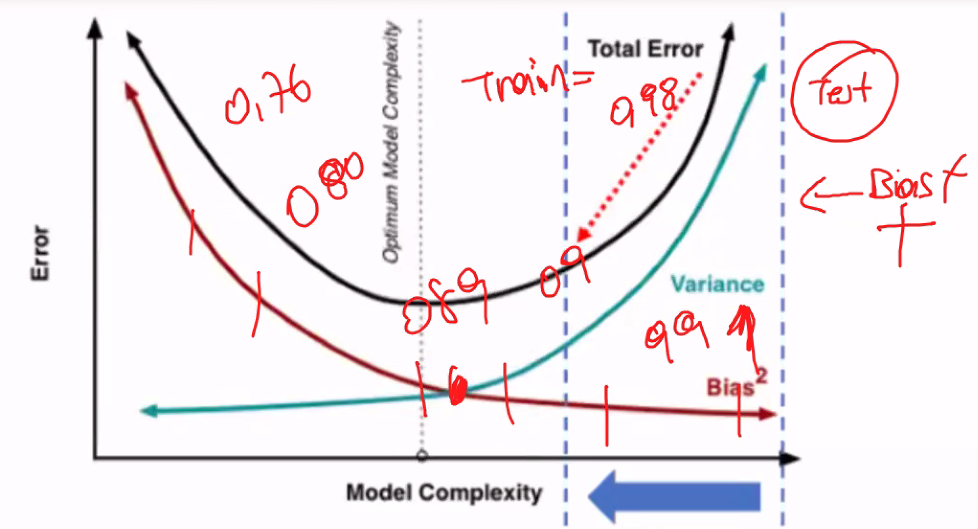

In [129]:
from sklearn.linear_model import Ridge

In [130]:
ridge_model = Ridge(alpha=1, random_state=42)

In [131]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [132]:
y_pred = ridge_model.predict(X_test_scaled)

y_train_pred = ridge_model.predict(X_train_scaled)

In [133]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


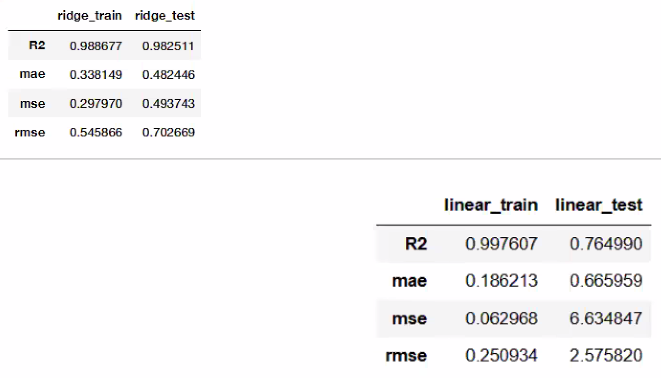

In [134]:
pd.concat([ls, rs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997607,0.764990,0.988677,0.982511
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
rmse,0.250934,2.575820,0.545866,0.702669


In [135]:
model = Ridge(alpha= 1.0, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train, 
                        scoring =["r2", "neg_mean_absolute_error", "neg_mean_squared_error",
                                 "neg_root_mean_squared_error"], cv=5)

In [136]:
pd.DataFrame(scores, index= range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002213,0.001459,0.988913,-0.405789,-0.336840,-0.580379
2,0.001004,0.001001,0.969951,-0.551469,-0.677493,-0.823099
3,0.000999,0.001002,0.950978,-0.552320,-1.360795,-1.166531
4,0.001016,0.000000,0.991259,-0.365106,-0.237919,-0.487769
5,0.001001,0.000000,0.986854,-0.343011,-0.243072,-0.493023


In [137]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:,2:].mean()

test_r2                             0.977591
test_neg_mean_absolute_error       -0.443539
test_neg_mean_squared_error        -0.571224
test_neg_root_mean_squared_error   -0.710160
dtype: float64

cv = 10 görelim;

In [138]:
model = Ridge(alpha= 1.0, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train, 
                        scoring =["r2", "neg_mean_absolute_error", "neg_mean_squared_error",
                                 "neg_root_mean_squared_error"], cv=10)

In [139]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:,2:].mean()

test_r2                             0.978573
test_neg_mean_absolute_error       -0.441032
test_neg_mean_squared_error        -0.561648
test_neg_root_mean_squared_error   -0.666021
dtype: float64

In [140]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")


,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


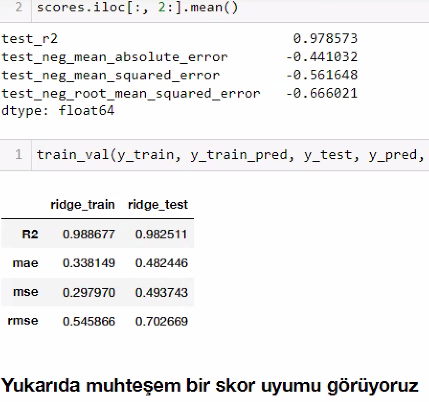
#### Yukarida muhtesem bir skor elde ettik


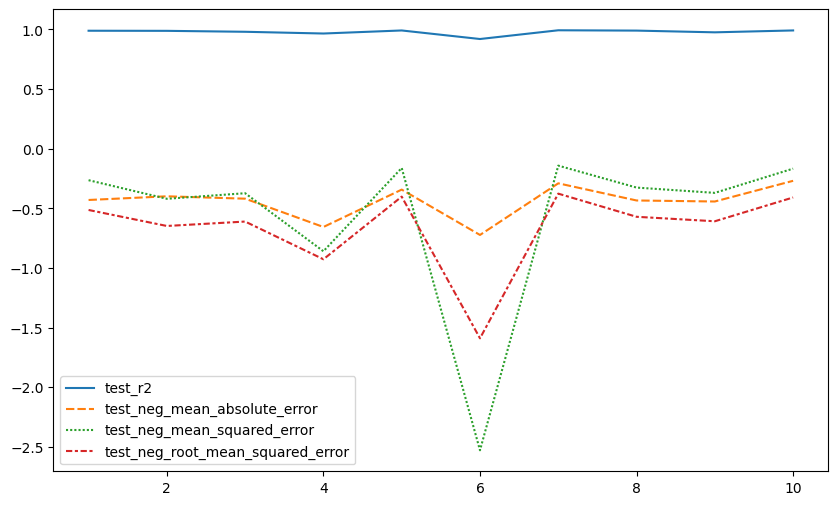

In [141]:
sns.lineplot(data = scores.iloc[:, 2:]);

In [142]:
pd.DataFrame(scores, index=range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002094,0.001005,0.989194,-0.430312,-0.264330,-0.514130
2,0.001000,0.001000,0.988294,-0.399467,-0.420281,-0.648291
3,0.000000,0.001506,0.980399,-0.419370,-0.373627,-0.611250
4,0.001005,0.001002,0.965854,-0.656779,-0.860334,-0.927542
5,0.000000,0.001002,0.991450,-0.343240,-0.161785,-0.402224
6,0.001001,0.001000,0.919753,-0.723583,-2.529543,-1.590454
7,0.001159,0.000000,0.993011,-0.290596,-0.142237,-0.377144
8,0.001592,0.000000,0.990300,-0.434471,-0.326317,-0.571241
9,0.000000,0.001000,0.975828,-0.443009,-0.370636,-0.608799
10,0.000000,0.001001,0.991642,-0.269488,-0.167392,-0.409136


In [143]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [144]:
rm_df = pd.DataFrame(ridge_model.coef_, columns=["ridge_coef_alpha=1"])
rm_df

,ridge_coef_alpha=1
0,3.428822
1,0.689086
2,0.170305
3,-0.910850
4,2.723077
5,0.112909
6,-0.404686
7,0.287950
8,-0.091937
9,-1.014535


In [145]:
pd.concat([lm_df, rm_df], axis=1)

,lm_coef,ridge_coef_alpha=1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


* Ridge bazi katsayilari kucultmus burada.
* Ridge ile feature selection yailamaz.
* Dusuk katsayilar onemsiz, buyukler onemli diyemeyiz.

## Choosing best alpha value Cross-Validation

#### hyper parametre secimi

In [146]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

#### Not:  en iyi alpha degerini RMSE ye göre aramak lazim.

In [147]:
from sklearn.linear_model import Ridge,RidgeCV

In [148]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [149]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [150]:
ridge_cv_model.alpha_     # endüsük alpha degerini dondurmek icin.

0.02

In [151]:
ridge_cv_model.best_score_   # endüfük RMSE degrini bulmak icin 

-0.5683736426879328

In [152]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [153]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


In [154]:
pd.concat([ls, rs, rcs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561


## Lasso